In [1]:
# import the package which we will use to programing
import os
import csv
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import torchvision
import random
import matplotlib.pyplot as plt
import pandas as pd
import torch.optim as optim
import math
import multiprocessing

In [2]:
from PIL import Image
# from google.colab import drive
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader, random_split
from torchmetrics.classification import MulticlassAccuracy
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from torchvision import datasets

In [3]:
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print ("MPS device is available. Successfully initiated:")
    print (x)
    device = mps_device
elif torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("GPU is available.")
    print("GPU device count:", torch.cuda.device_count())
    print("Current GPU device:", torch.cuda.current_device())
    print("GPU device name:", torch.cuda.get_device_name(torch.cuda.current_device()))
else:
    device = torch.device("cpu")

print("Use device:",device)

# set random seed
SEED = 6220
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)
torch.backends.cudnn.deterministic = True
multiprocessing.set_start_method("fork")

MPS device is available. Successfully initiated:
tensor([1.], device='mps:0')
Use device: mps


In [4]:
train_transform = transforms.Compose([

    ##############################################################################
    #                    TODO: Write the transform functions                     #
    ##############################################################################

    ##### Try to apply the augmentation functions
    transforms.RandomHorizontalFlip(),
    ## transforms.RandomRotation(15),

    ##############################################################################
    #                              END OF YOUR CODE                              #
    ##############################################################################

    transforms.ToTensor(),

    ##############################################################################
    #                    TODO: Write the normalized functions                    #
    ##############################################################################

    ##### Try to apply the normalized functions
    transforms.Normalize(0.485, 0.229),

    ##############################################################################
    #                              END OF YOUR CODE                              #
    ##############################################################################

    ])

valid_transform = transforms.Compose([

    transforms.ToTensor(),

    ##############################################################################
    #                    TODO: Write the normalized functions                    #
    ##############################################################################

    ##### Try to apply the normalized functions
    transforms.Normalize(0.485, 0.229),

    ##############################################################################
    #                              END OF YOUR CODE                              #
    ##############################################################################
    ])
# --------------------------------------------------------------------------------------------------------------------------------------------------
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=train_transform)

length = len(trainset)
print('Number of total train dataset:', length)

# (Bonus Part)
##############################################################################
#                    TODO: Split the training and validation sets            #
##############################################################################


##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

testset = datasets.MNIST(root='./data', train=False, download=True, transform=valid_transform)

print('Number of testset:', len(testset))
class_num = 10
classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
# --------------------------------------------------------------------------------------------------------------------------------------------------
# Loaded Datasets to DataLoaders

##############################################################################
#                    TODO: Validation Dataloader                             #
##############################################################################

# please change the batch_size
# torch.set_num_interop_threads(2)
# torch.set_num_threads(2)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True, num_workers = 0)
testloader = DataLoader(testset, batch_size=64, shuffle=False, num_workers = 0)

# (Bonus Part) Add a validation dataloader here.

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Number of total train dataset: 60000
Number of testset: 10000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


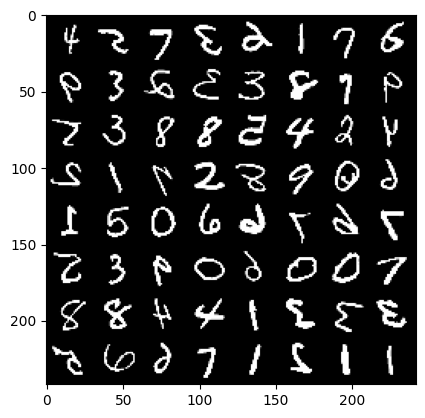

    4     5     7     3     2     1     7     6     9     3     2     3     3     8     7     9     5     3     8     8     5     4     2     4     2     1     7     2     8     9     0     6


In [5]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(32)))

In [6]:
##############################################
# Build your model here!
#
# Practice:
#   Try to implement MLP with pytorch !
##############################################

class trainmodel(nn.Module):
    def __init__(self):
        super(trainmodel, self).__init__()

        self.feat_classifier = nn.Sequential(

            ##############################################################################
            #                    TODO: Complete the code                                 #
            ##############################################################################

            # The Input should be height * width * channel
            # nn.Linear(height * width * channel, # of hidden layer neurons),
            nn.Linear(28*28*1,64),
            nn.ReLU(),
            nn.Linear(64,256),
            nn.Linear(256,64),
            nn.Linear(64,class_num),
            # (Opt) Try to make more different here

            # The output should be as class_num
            # nn.Linear(# of hidden layer neurons, class_num),

            ##############################################################################
            #                              END OF YOUR CODE                              #
            ##############################################################################

            nn.Softmax(dim=1),
            )

    def forward(self, x):

        ##############################################################################
        #                    TODO: Complete the code.                                #
        ##############################################################################

        # The shape of flatten output should be height * width * channel
        # x = x.view(-1, height * width * channel)
        x = x.view(-1, 28*28*1)
        ##############################################################################
        #                              END OF YOUR CODE                              #
        ##############################################################################

        out = self.feat_classifier(x)
        return out

model = trainmodel()
model.to(device)

trainmodel(
  (feat_classifier): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=256, bias=True)
    (3): Linear(in_features=256, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=10, bias=True)
    (5): Softmax(dim=1)
  )
)

In [7]:
##############################################################################
#                          TODO: Fill the parameters                         #
##############################################################################

batch_size = 64
channel = 1
height = 28
width = 28

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

result = model(torch.rand((batch_size, channel, height, width)).to(device))
print(result.shape)

torch.Size([64, 10])


In [8]:
## Use GPU
net = model.to(device)
criterion = nn.CrossEntropyLoss()

##############################################################################
#                         TODO: Design the Parameters                        #
##############################################################################

learning_rate = 0.005
optimizer = optim.SGD(net.parameters(), lr=learning_rate)
epochs = 5

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

net.train()

trainmodel(
  (feat_classifier): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=256, bias=True)
    (3): Linear(in_features=256, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=10, bias=True)
    (5): Softmax(dim=1)
  )
)

In [9]:
# Training model
train_loss = []
train_acc = []

for epoch in tqdm(range(epochs)):# loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        train_loss.append(loss.cpu().item())
        _, prex= torch.max(outputs, 1)
        metric = MulticlassAccuracy(num_classes = class_num)
        train_acc.append(metric(prex.cpu(), labels.cpu()))

        # backward (compute gradient)
        loss.backward()

        # optimize (update weights)
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if (i + 1) % 100 == 0:    # print every 100 iterations
            print('[Epoch: %d, Iteration: %5d] Loss: %.6f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

    # (Bonus part)
    ##############################################################################
    #                   TODO: Compute Validation Loss and Accuracy               #
    ##############################################################################

    ##############################################################################
    #                              END OF YOUR CODE                              #
    ##############################################################################

print('Finished Training')

  0%|          | 0/5 [00:00<?, ?it/s]

[Epoch: 1, Iteration:   100] Loss: 2.303013
[Epoch: 1, Iteration:   200] Loss: 2.300361
[Epoch: 1, Iteration:   300] Loss: 2.296625
[Epoch: 1, Iteration:   400] Loss: 2.291441
[Epoch: 1, Iteration:   500] Loss: 2.284942
[Epoch: 1, Iteration:   600] Loss: 2.272882
[Epoch: 1, Iteration:   700] Loss: 2.255978
[Epoch: 1, Iteration:   800] Loss: 2.236916
[Epoch: 1, Iteration:   900] Loss: 2.224413
[Epoch: 2, Iteration:   100] Loss: 2.196292
[Epoch: 2, Iteration:   200] Loss: 2.173217
[Epoch: 2, Iteration:   300] Loss: 2.143765
[Epoch: 2, Iteration:   400] Loss: 2.109568
[Epoch: 2, Iteration:   500] Loss: 2.074913
[Epoch: 2, Iteration:   600] Loss: 2.051828
[Epoch: 2, Iteration:   700] Loss: 2.030596
[Epoch: 2, Iteration:   800] Loss: 2.008534
[Epoch: 2, Iteration:   900] Loss: 1.995150
[Epoch: 3, Iteration:   100] Loss: 1.973595
[Epoch: 3, Iteration:   200] Loss: 1.952495
[Epoch: 3, Iteration:   300] Loss: 1.948448
[Epoch: 3, Iteration:   400] Loss: 1.937333
[Epoch: 3, Iteration:   500] Los

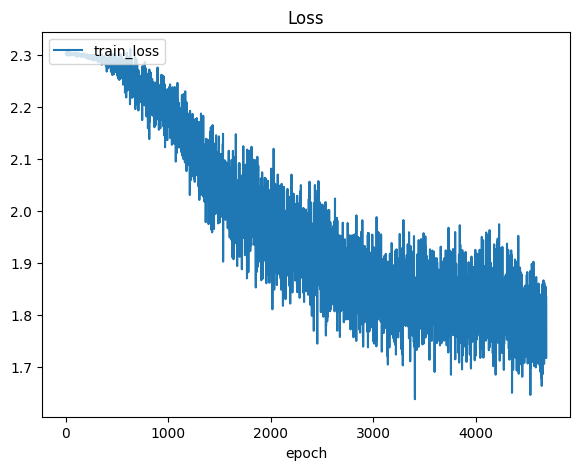

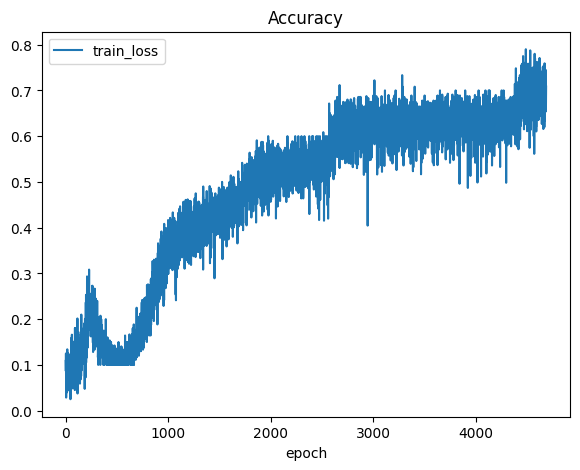

In [10]:
def plt_loss_acc(list_to_draw,name):
    fig = plt.figure(figsize=(15, 5))
    ax1 = fig.add_subplot(1, 2, 1)
    if name=="loss":
      ax1.set_title('Loss')
      ax1.plot(list_to_draw)
    elif name=="acc":
      ax1.set_title('Accuracy')
      ax1.plot(list_to_draw)
    ax1.set_xlabel('epoch')
    ax1.legend(['train_loss', 'train_acc'], loc='upper left')
    plt.show()

plt_loss_acc(train_loss, "loss")
plt_loss_acc(train_acc, "acc")

In [11]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %f %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 71.770000 %
